<a href="https://colab.research.google.com/github/Mohammed-majeed/DMT_VU/blob/master/DMT_Assignment_1_Task_4_5B_with_algorithms_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import re

import warnings
warnings.filterwarnings('ignore')

In [5]:
# pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_excel("ODI-2023.xlsx")
df.head()


,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,I have used ChatGPT to help me with some of my study assignments,When is your birthday (date)?,How many students do you estimate there are in the room?,Did you stand up to come to your previous answer ?,What is your stress level (0-100)?,How many hours per week do you do sports (in whole hours)?,Give a random number,Time you went to bed Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,2023-04-04 12:08:33.342,Masters - AI,yes,0,mu,nee,gender fluid,yes,23/11/1997,319,unknown,100,0,69,11:30,Ashes,Not ashes
1,2023-04-04 12:08:36.017,Artificial Intelligence,no,0,sigma,nee,male,not willing to say,"5th August, 1995",600,no,60,2,42,23.00,good food,good sleep
2,2023-04-04 12:08:37.501,AI,no,0,mu,nee,female,no,21/09,220,no,20,5,17,23:30,Sports,Friends
3,2023-04-04 12:08:51.909,Data mining,yes,1,mu,ja,male,yes,25-06-1996,100,unknown,50,5,12,11,Gym,Piano
4,2023-04-04 12:08:59.019,Quantitative Risk Management,no,0,mu,nee,male,yes,18-08-1998,300,no,65,10,874,11,Relax,Sun


In [7]:

months = {'january': 1,'jan': 1,'february': 2,'feb': 2,'march': 3,'april': 4,'may': 5,'june': 6,'july': 7,
    'august': 8 ,'september': 9,'sept': 9,'october': 10,'november': 11,'december': 12,'th': "",'nd':"",'fr':"",'bc':''}    

In [8]:
# correct "When is your birthday (date)?" column

birthday  = df["When is your birthday (date)?"]
for x in range(len(birthday)):
    birthday[x] = str(birthday[x]).lower()
    for i in months:
        if i in birthday[x]:
            birthday[x] = birthday[x].replace(i,str(months[i]))
    temp = ""
    for y in range(len(birthday[x])):
        if not birthday[x][y].isalpha() and not birthday[x][y].isdigit():
            temp += " "
        else:
            temp += birthday[x][y]
    birthday[x] = temp.strip()
    if len(birthday[x])<8 or len(birthday[x])>10 or birthday[x].count(" ")!=2:
        birthday[x] = "NaN"
    
    birthday[x]= birthday[x].split(" ")
    
for i in range(len(birthday)):
    if len(str(birthday[i][0]))==4:
        birthday[i][0],birthday[i][-1]=birthday[i][-1],birthday[i][0]
    
    if not birthday[i][-1] == "NaN":
        if int(birthday[i][-1]) < 1950:
            birthday[i] = ["NaN"]
            
for i in range(len(birthday)):
    birthday[i] = " ".join([str(elem) for elem in birthday[i]])
    
# df['When is your birthday (date)?'] = pd.to_datetime(df['When is your birthday (date)?'], format='%d %m %Y')


In [9]:
# correct "What is your stress level (0-100)?" column

for index, row in df.iterrows():
    stress_level = str(row['What is your stress level (0-100)?'])    

    if not stress_level.isdigit() or int(stress_level) < 0 or int(stress_level) > 100:
        df['What is your stress level (0-100)?'][index] = "NaN"

In [10]:
# replace the levels of the words with numbers
row_values={"yes":1, "no":0 , "mu":1 , "sigma":0, "ja":1, "nee":0, "unknown":"NaN",
           "male":1, "female":2, "intersex":3, "nonbinary":4, "non-binary":4, "gender fluid":5, "other":6,
            "not willing to answer":7,"not willing to say":8}

for key, value in df.iteritems():
    for ele in range(len(value)):
        if value[ele] in row_values.keys():
            value[ele] = row_values[value[ele]]   

In [11]:
# correct "How many students do you estimate there are in the room?" column

for index, row in df.iterrows():
    students_num = str(row['How many students do you estimate there are in the room?'])
    numbers = r'^[10-1000]$'
    if not students_num.isdigit() or int(students_num) < 10 or int(students_num) > 1000:
        df['How many students do you estimate there are in the room?'][index] = "NaN"

In [12]:
# correct "How many hours per week do you do sports (in whole hours)? " column

# remove the characters
for index, row in df.iterrows():
    students_num = str(row["How many hours per week do you do sports (in whole hours)? "])
    numbers = r'^[0-9]{1,3}\W[0-9]{1,3}$'     
    if re.search(numbers, students_num): 
        if "-" in students_num:
            indx = students_num.index('-')
            students_num = str(int((int(students_num[:indx:]) + int(students_num[indx+1::]))/2))
            df["How many hours per week do you do sports (in whole hours)? "][index] = students_num
            pass
        if "/" in students_num:
            indx = students_num.index('/')
            students_num = str(int(students_num[:indx:]) + int(students_num[indx+1::]))
            df["How many hours per week do you do sports (in whole hours)? "][index] = students_num
            pass
        else:
            df["How many hours per week do you do sports (in whole hours)? "][index] = str(int(float(students_num)))
            pass

# remove the words
for index, row in df.iterrows():
    temp = ""
    students_hours = str(row["How many hours per week do you do sports (in whole hours)? "])
    for y in range(len(students_hours)):
        if not students_hours[y].isdigit():
            temp += ""
        else:
            temp += students_hours[y]  
        df["How many hours per week do you do sports (in whole hours)? "][index] = temp.strip()            
# replace empty string and stranges numbers with non
for index, row in df.iterrows():
    students_hours = str(row["How many hours per week do you do sports (in whole hours)? "])
    if not students_hours.isdigit() or int(students_hours) < 0 or int(students_hours) > 150:
        df["How many hours per week do you do sports (in whole hours)? "][index] = "NaN"


In [13]:
# remove the words
for index, row in df.iterrows():
    temp = ""
    bed_time = str(row['Time you went to bed Yesterday'])
    for y in range(len(bed_time)):
        if not bed_time[y].isdigit():
            temp += " "
        else:
            temp += bed_time[y]  
        df['Time you went to bed Yesterday'][index] = temp.strip()
        
# make the same format
for index, row in df.iterrows():
    bed_time = str(row['Time you went to bed Yesterday']).strip()
    
    if len(bed_time) ==5:
        bed_time=bed_time[:2:]+":"+bed_time[3::]
        df['Time you went to bed Yesterday'][index] = bed_time
        
    if len(bed_time) ==4:
        bed_time=bed_time[:2:]+":"+bed_time[2::]
        df['Time you went to bed Yesterday'][index] = bed_time
        
    if len(bed_time) ==2:
        temp= bed_time + ":00"
        df['Time you went to bed Yesterday'][index] = temp

    if len(bed_time) ==1:
        temp= "0"+ bed_time + ":00"
        df['Time you went to bed Yesterday'][index] = temp  
        
    if len(bed_time) ==0:
        df['Time you went to bed Yesterday'][index] = "NaN"         
        
for index, row in df.iterrows():
    df['Time you went to bed Yesterday'][index]=df['Time you went to bed Yesterday'][index].replace("12","00")
    df['Time you went to bed Yesterday'][index]=df['Time you went to bed Yesterday'][index].replace("24","00")
    df['Time you went to bed Yesterday'][index]=df['Time you went to bed Yesterday'][index].replace("11","23")
    
df['Time you went to bed Yesterday'] = df['Time you went to bed Yesterday'].str.replace(' ', '')
df['Time you went to bed Yesterday'] = pd.to_datetime(df['Time you went to bed Yesterday'], format='%H:%M')
df['Time you went to bed Yesterday'] = df['Time you went to bed Yesterday'].dt.time

In [14]:
courses = {'artificial intelligence': "AI",
          'ai': "AI",
           'artif': "AI",
          "quantitative risk management":"QRM",
          'business analytics': "BA",
           'ba': "BA",
           "finance":"Finance",
           
           "computer science":"CS",
           "cs":"CS",
           
           "information sciences":"Info Sci",
           "info sci":"Info Sci",

           "computational science":"Comp Sci",
           "comp sci":"Comp Sci",
           
           "biomedical sciences":"Bio Sci",
           "bio sci":"Bio Sci",
           "phd":"PHD",
           "exchange":"Exch",
           "high school 3rd grade":"3rd Gr",
           "big data engineering":"Data Eng",
           "big data eng":"Data Eng",
           "digital business":"Digi Bus",
           "human language":"Hum Lang Tech",
           "cls":"CLS",
           "neuroscience":"Neur sci",
           "data mining":"Data Mining",
           "qrm":"QRM",
           "policy analysis":"P Analysis"       

          } 

In [15]:
for index, row in df.iterrows():
    df['What programme are you in?'][index]=str(df['What programme are you in?'][index]).lower()

for index, row in df.iterrows():
     for i in courses:
        if i in df['What programme are you in?'][index]:            
            df['What programme are you in?'][index] = courses[i]
            
for index, row in df.iterrows(): 
    if not df['What programme are you in?'][index] in courses.values():
        df['What programme are you in?'][index] = "NaN"

In [16]:
# calculat age 

from datetime import datetime

# Convert the column to a Timestamp object
df['When is your birthday (date)?'] = pd.to_datetime(df['When is your birthday (date)?'], format='%d %m %Y', errors='coerce')

# Calculate the age in years
now = datetime.now()
df['age'] = (now - df['When is your birthday (date)?']) // pd.Timedelta(days=365.25)
df.insert(9, 'age', df.pop('age'))


In [17]:
# get the second last row
second_last_row = df.iloc[-2]
# drop the second last row
df = df.drop(df.index[-2])
# insert the second last row as the first row
df = pd.concat([second_last_row.to_frame().T, df], ignore_index=True)

In [18]:
df.to_csv('new_data_before_miss_value.csv', index=False)
df.to_excel('new_data_before_miss_value.xlsx', index=False)


In [19]:
# df['What programme are you in?'].nunique()

In [20]:
df = pd.read_csv("new_data_before_miss_value.csv")

In [21]:
df.nunique()

Tijdstempel                                                          302
What programme are you in?                                            18
Have you taken a course on machine learning?                           2
Have you taken a course on information retrieval?                      2
Have you taken a course on statistics?                                 2
Have you taken a course on databases?                                  2
What is your gender?                                                   6
I have used ChatGPT to help me with some of my study assignments       3
When is your birthday (date)?                                        204
age                                                                   16
How many students do you estimate there are in the room?              99
Did you stand up to come to your previous answer    ?                  2
What is your stress level (0-100)?                                    56
How many hours per week do you do sports (in whole 

In [22]:
df.isnull().sum(axis = 0)

Tijdstempel                                                           0
What programme are you in?                                            5
Have you taken a course on machine learning?                          3
Have you taken a course on information retrieval?                    23
Have you taken a course on statistics?                               16
Have you taken a course on databases?                                 1
What is your gender?                                                  0
I have used ChatGPT to help me with some of my study assignments      0
When is your birthday (date)?                                        83
age                                                                  83
How many students do you estimate there are in the room?              8
Did you stand up to come to your previous answer    ?                12
What is your stress level (0-100)?                                   21
How many hours per week do you do sports (in whole hours)?      

In [23]:
# full the missing valuse
for columnName, columnData in df.iteritems():
    # Check if the data type of the column is numeric
    if df[columnName].dtype != 'object':
        # If the data type is numeric, interpolate and round the column
        df[columnName] = df[columnName].interpolate(method='linear').round()
    else:
        # Replace missing values with the mode of the column
        mode = df[columnName].mode()[0]
        df[columnName].fillna(mode, inplace=True)

In [24]:
df.isnull().sum(axis = 0)

Tijdstempel                                                          0
What programme are you in?                                           0
Have you taken a course on machine learning?                         0
Have you taken a course on information retrieval?                    0
Have you taken a course on statistics?                               0
Have you taken a course on databases?                                0
What is your gender?                                                 0
I have used ChatGPT to help me with some of my study assignments     0
When is your birthday (date)?                                        0
age                                                                  0
How many students do you estimate there are in the room?             0
Did you stand up to come to your previous answer    ?                0
What is your stress level (0-100)?                                   0
How many hours per week do you do sports (in whole hours)?           0
Give a

In [25]:
df.nunique()

Tijdstempel                                                          302
What programme are you in?                                            18
Have you taken a course on machine learning?                           2
Have you taken a course on information retrieval?                      2
Have you taken a course on statistics?                                 2
Have you taken a course on databases?                                  2
What is your gender?                                                   6
I have used ChatGPT to help me with some of my study assignments       3
When is your birthday (date)?                                        204
age                                                                   16
How many students do you estimate there are in the room?             102
Did you stand up to come to your previous answer    ?                  2
What is your stress level (0-100)?                                    60
How many hours per week do you do sports (in whole 

In [26]:
# save the New_data
df.to_csv('new_data_fill_missing_linear&mode.csv', index=False)

In [27]:
df = pd.read_csv("new_data_before_miss_value.csv")


In [28]:
df.nunique()

Tijdstempel                                                          302
What programme are you in?                                            18
Have you taken a course on machine learning?                           2
Have you taken a course on information retrieval?                      2
Have you taken a course on statistics?                                 2
Have you taken a course on databases?                                  2
What is your gender?                                                   6
I have used ChatGPT to help me with some of my study assignments       3
When is your birthday (date)?                                        204
age                                                                   16
How many students do you estimate there are in the room?              99
Did you stand up to come to your previous answer    ?                  2
What is your stress level (0-100)?                                    56
How many hours per week do you do sports (in whole 

In [29]:
df.isnull().sum(axis = 0)

Tijdstempel                                                           0
What programme are you in?                                            5
Have you taken a course on machine learning?                          3
Have you taken a course on information retrieval?                    23
Have you taken a course on statistics?                               16
Have you taken a course on databases?                                 1
What is your gender?                                                  0
I have used ChatGPT to help me with some of my study assignments      0
When is your birthday (date)?                                        83
age                                                                  83
How many students do you estimate there are in the room?              8
Did you stand up to come to your previous answer    ?                12
What is your stress level (0-100)?                                   21
How many hours per week do you do sports (in whole hours)?      

In [30]:
# fill with prevous row values
df = df.fillna(method='pad')

In [31]:
df.nunique()

Tijdstempel                                                          302
What programme are you in?                                            18
Have you taken a course on machine learning?                           2
Have you taken a course on information retrieval?                      2
Have you taken a course on statistics?                                 2
Have you taken a course on databases?                                  2
What is your gender?                                                   6
I have used ChatGPT to help me with some of my study assignments       3
When is your birthday (date)?                                        204
age                                                                   16
How many students do you estimate there are in the room?              99
Did you stand up to come to your previous answer    ?                  2
What is your stress level (0-100)?                                    56
How many hours per week do you do sports (in whole 

In [32]:
df.isnull().sum(axis = 0)

Tijdstempel                                                          0
What programme are you in?                                           0
Have you taken a course on machine learning?                         0
Have you taken a course on information retrieval?                    0
Have you taken a course on statistics?                               0
Have you taken a course on databases?                                0
What is your gender?                                                 0
I have used ChatGPT to help me with some of my study assignments     0
When is your birthday (date)?                                        0
age                                                                  0
How many students do you estimate there are in the room?             0
Did you stand up to come to your previous answer    ?                0
What is your stress level (0-100)?                                   0
How many hours per week do you do sports (in whole hours)?           0
Give a

In [33]:
# save the New_data
df.to_csv('new_data_fill_missing_with_previous_row.csv', index=False)

# Task 1A_b


In [34]:
import seaborn as sns


Text(0.5, 1.0, 'missing Values')

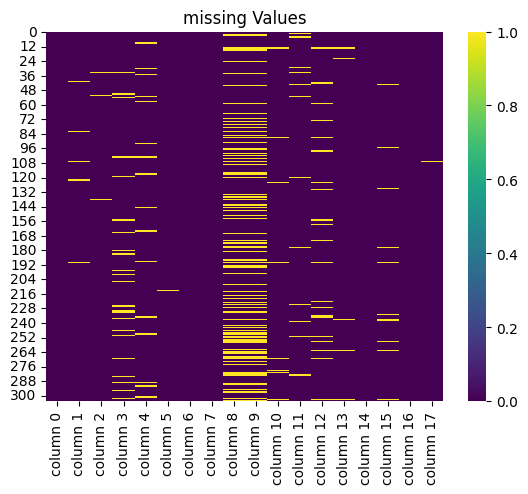

In [35]:
df = pd.read_csv('new_data_before_miss_value.csv')

# Create a heatmap to visualize the missing values
plt = sns.heatmap(df.isnull(), cmap='viridis',xticklabels = [f"column {i}" for i in range(len(df.columns))])
plt.set_title('missing Values')


Text(0.5, 23.52222222222222, 'Features')

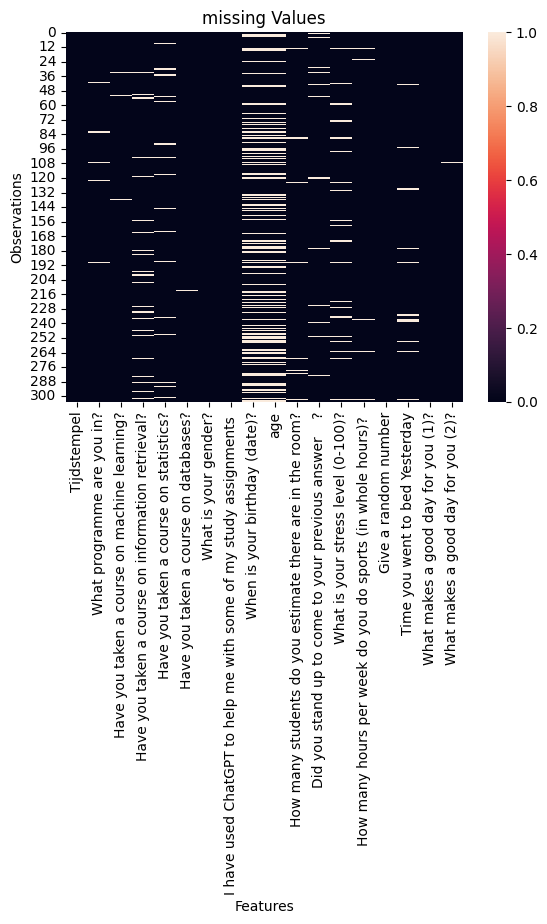

In [36]:
plt = sns.heatmap(df.isnull())
plt.set_title('missing Values')
plt.set_ylabel('Observations')
plt.set_xlabel('Features')

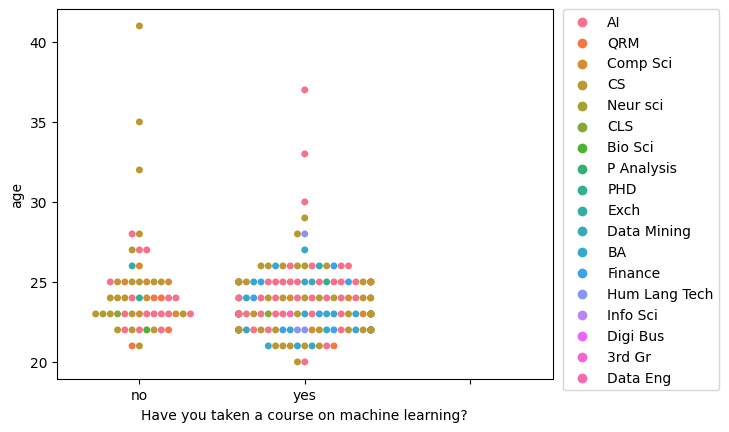

In [37]:
x = sns.swarmplot(data=df, x=df['Have you taken a course on machine learning?'],y=df["age"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
x.set_xticklabels(["no","yes"]);

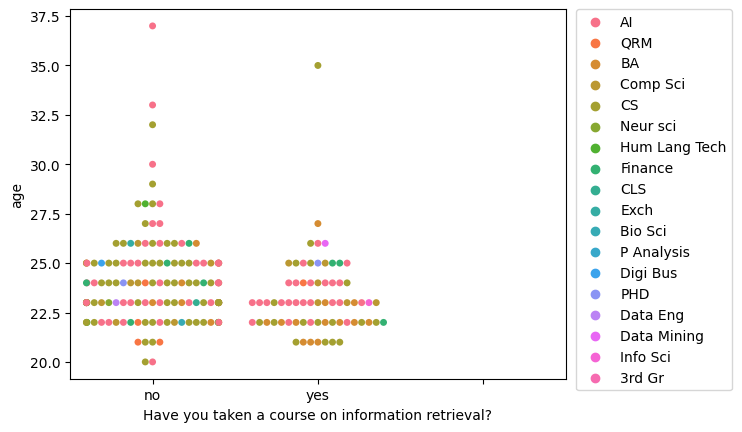

In [38]:
x = sns.swarmplot(data=df, x=df['Have you taken a course on information retrieval?'],y=df["age"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
x.set_xticklabels(["no","yes"]);

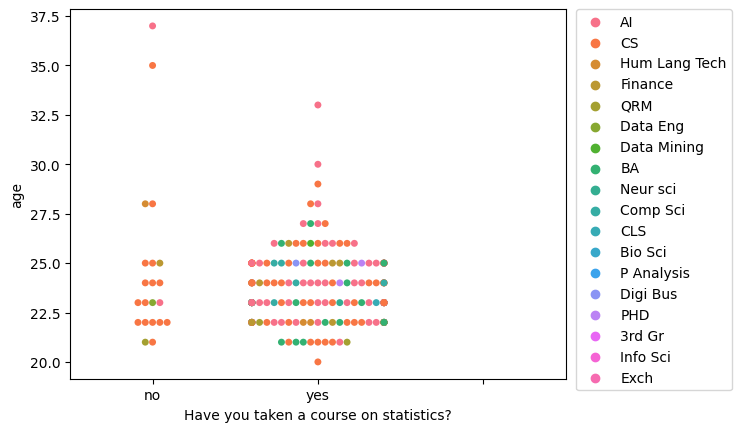

In [39]:
x = sns.swarmplot(data=df, x=df['Have you taken a course on statistics?'],y=df["age"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
x.set_xticklabels(["no","yes"]);

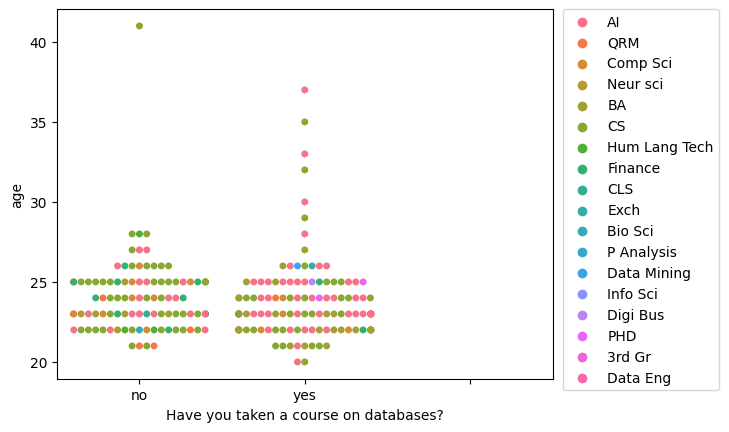

In [40]:
x = sns.swarmplot(data=df, x=df['Have you taken a course on databases?'],y=df["age"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
x.set_xticklabels(["no","yes"]);

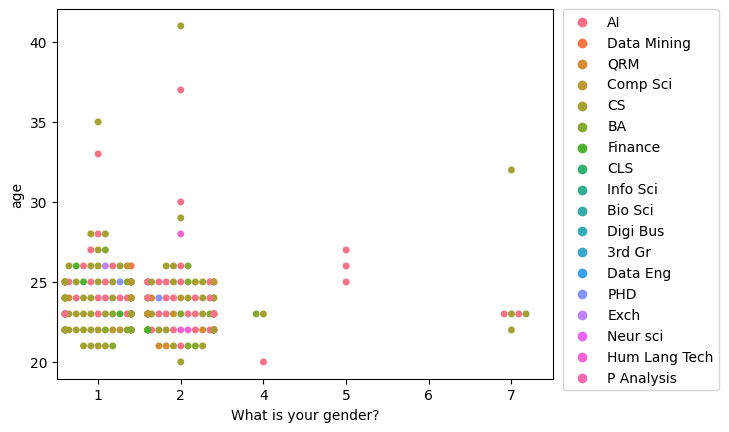

In [41]:
x = sns.swarmplot(data=df, x=df['What is your gender?'],y=df["age"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# x.set_xticklabels(["no","yes"]);

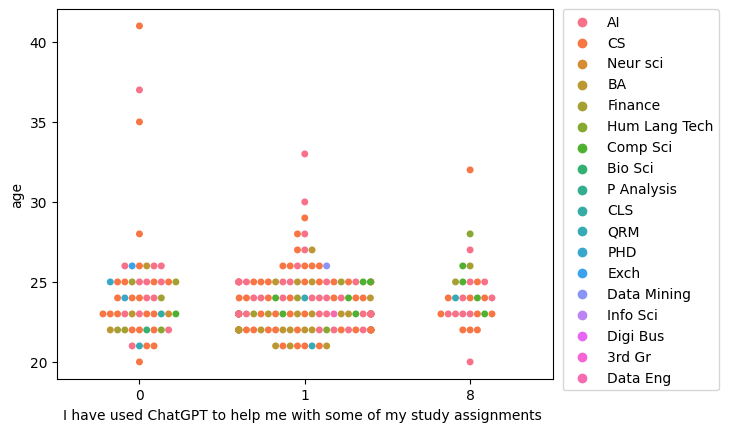

In [42]:
x = sns.swarmplot(data=df, x=df['I have used ChatGPT to help me with some of my study assignments '],y=df["age"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
# x.set_xticklabels(["no","yes"]);

In [43]:
import pandas as pd

# Create a dataframe with a column of strings representing times
# df = pd.DataFrame({'Time you went to bed Yesterday': ['2023-04-07 23:00:00', '2023-04-07 22:00:00', '2023-04-07 21:00:00']})

# Convert the column to a datetime-like object
df['Time you went to bed Yesterday'] = pd.to_datetime(df['Time you went to bed Yesterday'])

# Extract the hour using the .dt accessor
df['Hour'] = df['Time you went to bed Yesterday'].dt.hour

print(df)



# df['Hour'] = df['Time you went to bed Yesterday'].dt.hour

                 Tijdstempel What programme are you in?  \
0    2023-04-04 12:16:05.346                         AI   
1    2023-04-04 12:08:33.342                         AI   
2    2023-04-04 12:08:36.017                         AI   
3    2023-04-04 12:08:37.501                         AI   
4    2023-04-04 12:08:51.909                Data Mining   
..                       ...                        ...   
300  2023-04-04 12:13:31.269                         CS   
301  2023-04-04 12:13:32.854                       Exch   
302  2023-04-04 12:13:41.702                         CS   
303  2023-04-04 12:14:41.914                         AI   
304  2023-04-04 12:28:05.558                         CS   

     Have you taken a course on machine learning?  \
0                                             1.0   
1                                             1.0   
2                                             0.0   
3                                             0.0   
4                         

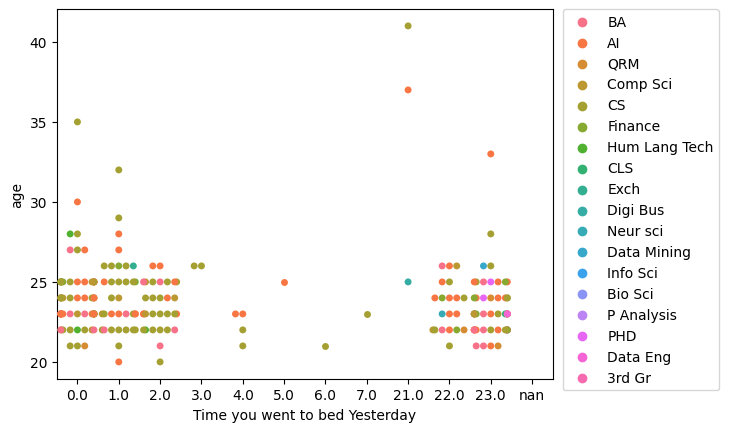

In [44]:
#Time you went to bed Yesterday
x = sns.swarmplot(data=df, x=df['Time you went to bed Yesterday'].dt.hour,y=df["age"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

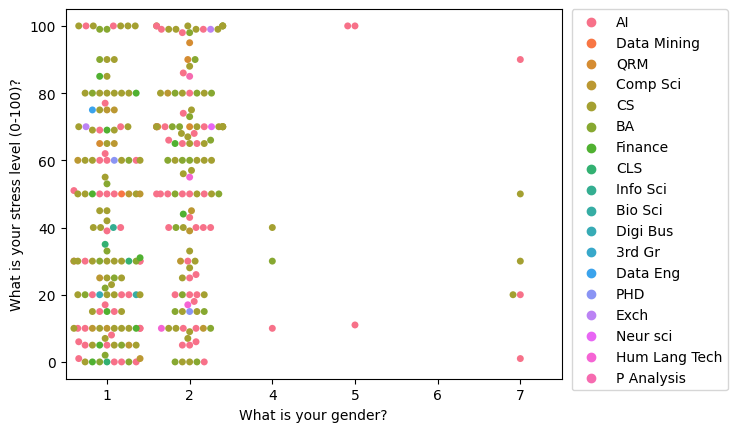

In [45]:
x = sns.swarmplot(data=df, x=df['What is your gender?'],y=df["What is your stress level (0-100)?"],hue=df["What programme are you in?"])
x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

In [46]:
# x = sns.swarmplot(data=df, y=df['Hour'],x=df["What is your stress level (0-100)?"],hue=df["What programme are you in?"])
# x.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

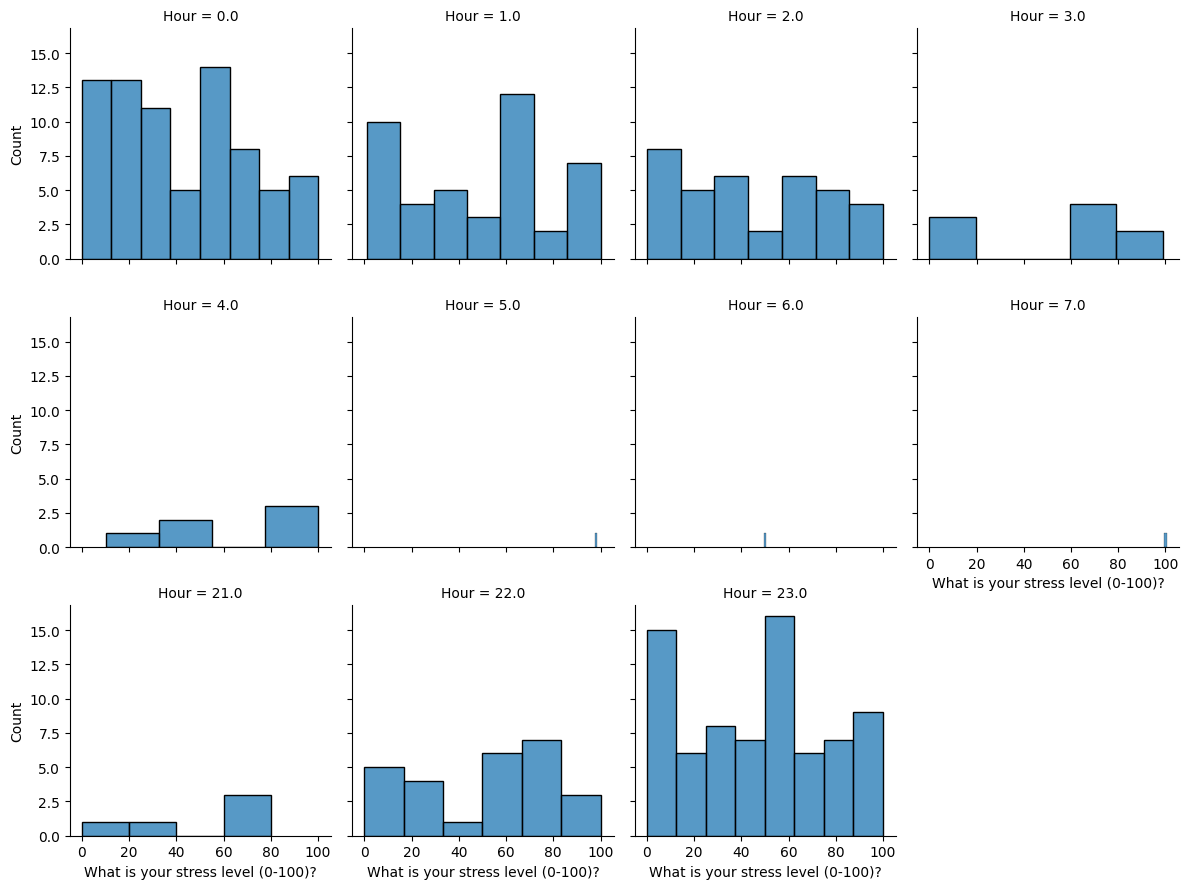

In [47]:
g = sns.FacetGrid(df, col="Hour", col_wrap=4)
g.map(sns.histplot, "What is your stress level (0-100)?")

<Axes: >

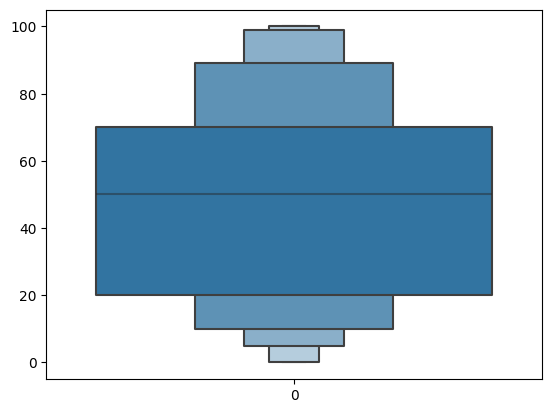

In [48]:
sns.boxenplot(df["What is your stress level (0-100)?"],)

<Axes: xlabel='What is your stress level (0-100)?', ylabel='Density'>

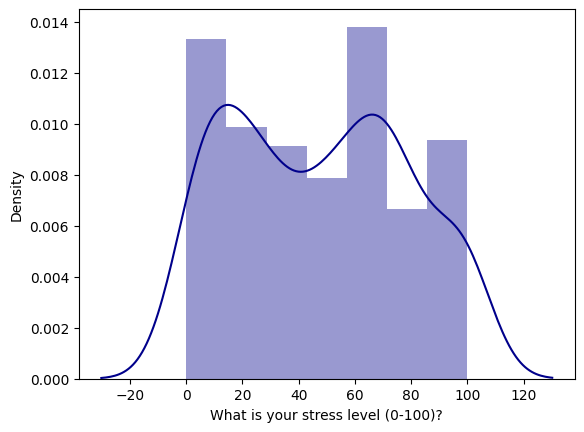

In [49]:
sns.distplot(df["What is your stress level (0-100)?"],color='darkblue')

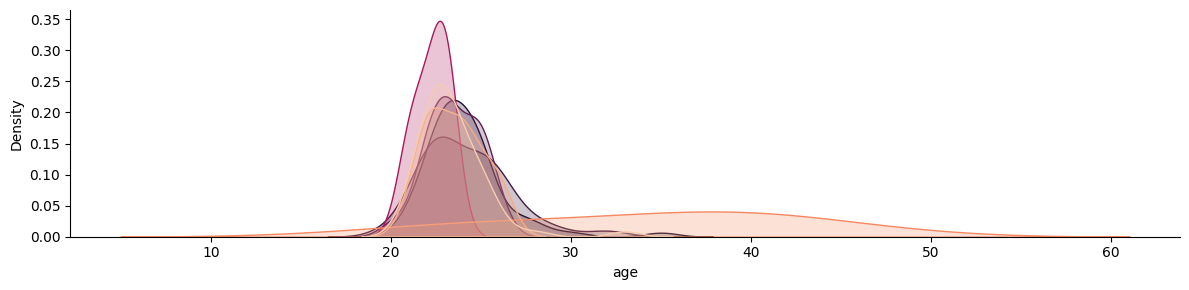

In [50]:
df = df.dropna(subset=['Hour'])
fig = sns.FacetGrid(df, hue='Hour', aspect=4, palette='rocket')
fig.map(sns.kdeplot, 'age', shade=True)

In [51]:
# fig = sns.FacetGrid(df["What is your stress level (0-100)?"], hue=df'"Hour"', aspect=4,palette="rocket")
# fig.map(sns.kdeplot,'age',shade=True)



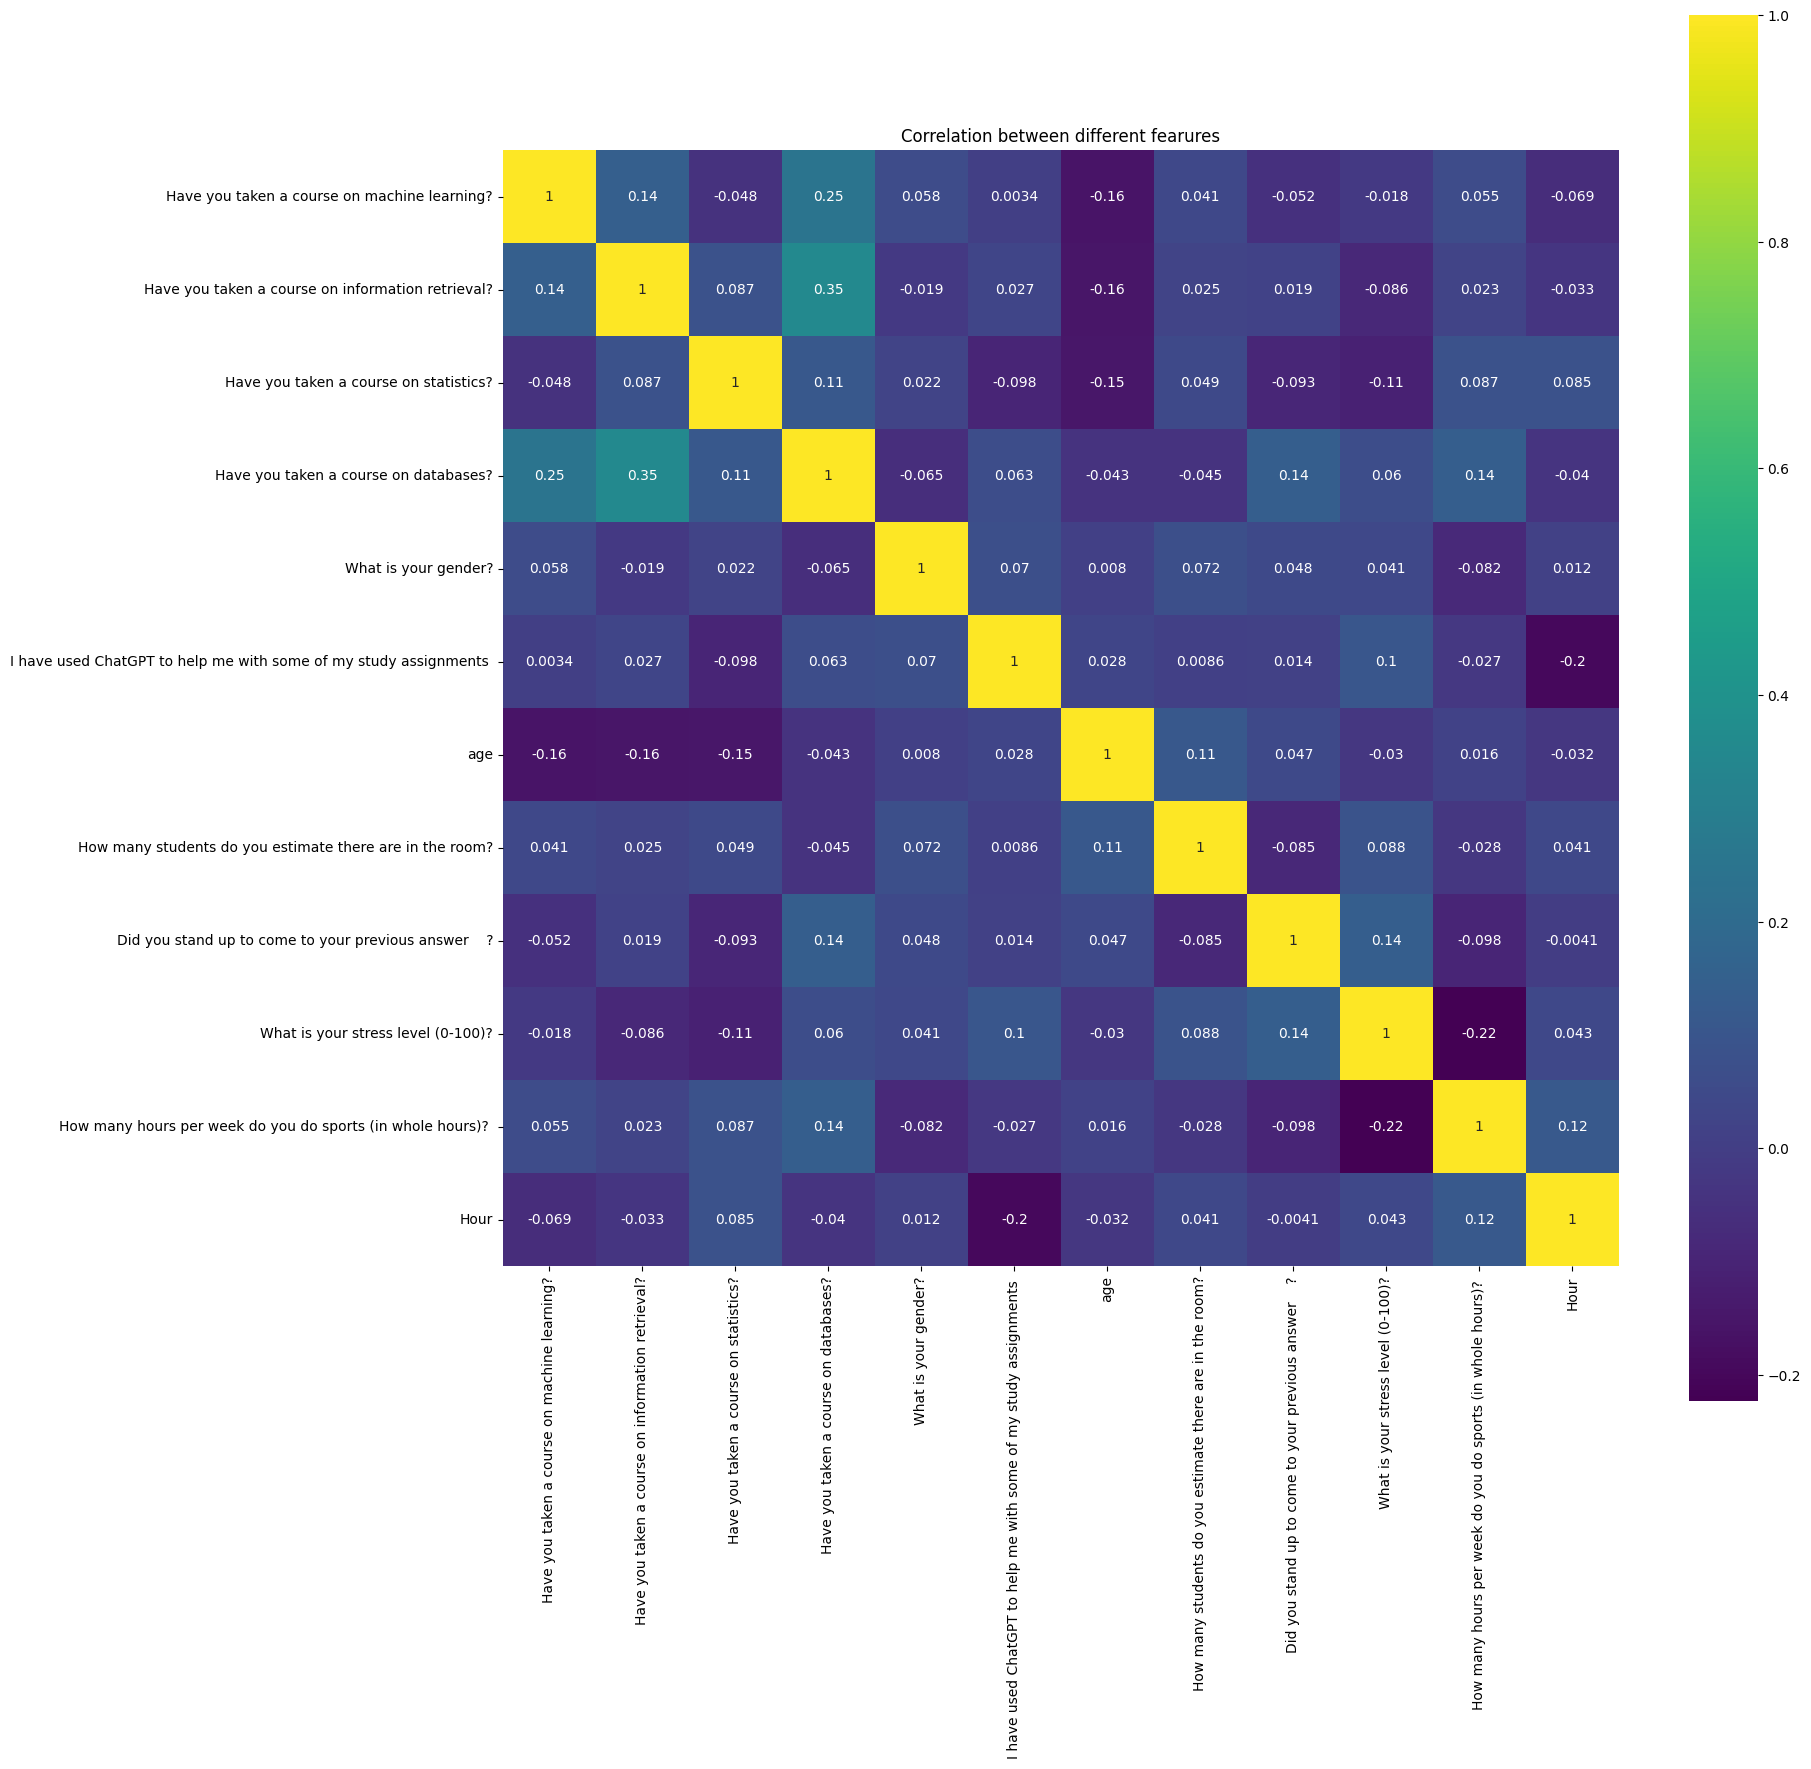

In [52]:
import matplotlib.pyplot as plt


correlation = df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different fearures');  


In [53]:

new_data = pd.read_excel("cleaned_data_regression.xlsx")
new_data

,What is your stress level (0-100)?,How many hours per week do you do sports (in whole hours)?
0,100,0.0
1,60,2.0
2,20,5.0
3,50,5.0
4,65,10.0
...,...,...
288,70,10.0
289,70,0.0
290,10,5.0
291,50,1.0


In [66]:
# X = new_data['How many hours per week do you do sports (in whole hours)?']
# y = new_data['What is your stress level (0-100)?'] 

 

#X = new_data['How many hours per week do you do sports (in whole hours)?'].values
X = new_data.loc[:, "How many hours per week do you do sports (in whole hours)? "]
y = new_data.loc[:, "What is your stress level (0-100)? "]

KeyError: ignored

In [67]:
X = new_data[1]
y = new_data[0]

plt.scatter(X, y)


KeyError: ignored

In [68]:
print(len(X)) 
print(len(y))

293


TypeError: ignored

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 304
Data columns (total 19 columns):
 #   Column                                                             Non-Null Count  Dtype         
---  ------                                                             --------------  -----         
 0   Tijdstempel                                                        294 non-null    object        
 1   What programme are you in?                                         290 non-null    object        
 2   Have you taken a course on machine learning?                       291 non-null    float64       
 3   Have you taken a course on information retrieval?                  271 non-null    float64       
 4   Have you taken a course on statistics?                             278 non-null    float64       
 5   Have you taken a course on databases?                              293 non-null    float64       
 6   What is your gender?                                              

In [70]:
dta_ = pd.read_csv("new_data_fill_missing_linear&mode.csv") 
dta_

,Tijdstempel,What programme are you in?,Have you taken a course on machine learning?,Have you taken a course on information retrieval?,Have you taken a course on statistics?,Have you taken a course on databases?,What is your gender?,I have used ChatGPT to help me with some of my study assignments,When is your birthday (date)?,age,How many students do you estimate there are in the room?,Did you stand up to come to your previous answer ?,What is your stress level (0-100)?,How many hours per week do you do sports (in whole hours)?,Give a random number,Time you went to bed Yesterday,What makes a good day for you (1)?,What makes a good day for you (2)?
0,2023-04-04 12:16:05.346,AI,1.0,0.0,1.0,0.0,1,8,1999-05-14,23.0,100.0,0.0,50.0,1.0,1,04:30:00,Work,Relationships
1,2023-04-04 12:08:33.342,AI,1.0,0.0,1.0,0.0,5,1,1997-11-23,25.0,319.0,0.0,100.0,0.0,69,23:30:00,Ashes,Not ashes
2,2023-04-04 12:08:36.017,AI,0.0,0.0,0.0,0.0,1,8,1999-05-14,25.0,600.0,0.0,60.0,2.0,42,23:00:00,good food,good sleep
3,2023-04-04 12:08:37.501,AI,0.0,0.0,1.0,0.0,2,0,1999-05-14,26.0,220.0,0.0,20.0,5.0,17,23:30:00,Sports,Friends
4,2023-04-04 12:08:51.909,Data Mining,1.0,1.0,1.0,1.0,1,1,1996-06-25,26.0,100.0,0.0,50.0,5.0,12,23:00:00,Gym,Piano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2023-04-04 12:13:31.269,CS,1.0,1.0,0.0,1.0,1,8,2000-07-25,22.0,200.0,0.0,70.0,10.0,67,01:00:00,Good meal.,Nice weather.
301,2023-04-04 12:13:32.854,Exch,0.0,0.0,0.0,1.0,1,0,1996-12-13,26.0,400.0,0.0,70.0,0.0,13,01:09:00,Productive,Successful
302,2023-04-04 12:13:41.702,CS,1.0,0.0,1.0,0.0,2,0,1999-05-14,26.0,150.0,0.0,10.0,5.0,18,04:00:00,Nice people,Educational accomplishments
303,2023-04-04 12:14:41.914,AI,1.0,0.0,1.0,1.0,5,0,1996-09-04,26.0,175.0,1.0,45.0,4.0,69.,00:00:00,never before seen trauma,you :)


In [71]:
X = new_data['How many hours per week do you do sports (in whole hours)? ']
y = new_data['What is your stress level (0-100)?'] 

Text(0, 0.5, 'stress level (0-100)')

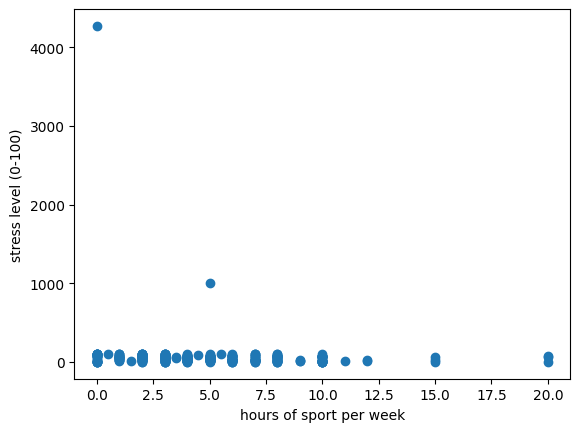

In [72]:
import matplotlib.pyplot as plt 
plt.scatter(X, y) 
plt.xlabel("hours of sport per week")
plt.ylabel("stress level (0-100)") 

In [73]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 23)

In [74]:
X_train

140    3.0
143    3.0
175    3.0
52     5.5
30     2.0
      ... 
237    1.0
31     8.0
40     2.0
230    8.0
83     6.0
Name: How many hours per week do you do sports (in whole hours)? , Length: 175, dtype: float64

In [75]:
import numpy as np 
X_train = np.array(X_train).reshape(-1, 1) 
X_train

array([[ 3. ],
       [ 3. ],
       [ 3. ],
       [ 5.5],
       [ 2. ],
       [ 8. ],
       [ 4. ],
       [ 8. ],
       [10. ],
       [ 2. ],
       [ 6. ],
       [ 5. ],
       [ 7. ],
       [12. ],
       [ 4. ],
       [ 5. ],
       [ 8. ],
       [ 3. ],
       [10. ],
       [ 2. ],
       [ 8. ],
       [ 6. ],
       [ 0. ],
       [ 3. ],
       [ 2. ],
       [ 8. ],
       [10. ],
       [ 5. ],
       [ 3.5],
       [ 5. ],
       [ 6. ],
       [ 2. ],
       [ 3. ],
       [15. ],
       [10. ],
       [ 4. ],
       [ 0. ],
       [ 7. ],
       [ 8. ],
       [10. ],
       [ 3. ],
       [ 4. ],
       [ 8. ],
       [ 2. ],
       [ 6. ],
       [ 5. ],
       [ 5. ],
       [ 3. ],
       [ 3. ],
       [ 1. ],
       [ 7. ],
       [ 3. ],
       [ 3. ],
       [ 6. ],
       [10. ],
       [ 8. ],
       [ 1. ],
       [ 1. ],
       [ 7. ],
       [ 8. ],
       [ 4. ],
       [ 6. ],
       [ 0. ],
       [10. ],
       [ 2. ],
       [ 4. ],
       [10

In [76]:
y_train = np.array(y_train).reshape(-1, 1)
y_train

array([[  70],
       [  50],
       [  30],
       [  99],
       [  80],
       [   0],
       [  10],
       [  60],
       [  10],
       [  30],
       [  30],
       [  74],
       [  25],
       [  30],
       [  10],
       [ 100],
       [  70],
       [  50],
       [  70],
       [  20],
       [  50],
       [  30],
       [   5],
       [   5],
       [  56],
       [   5],
       [  65],
       [  60],
       [  57],
       [  50],
       [  30],
       [  20],
       [  40],
       [   0],
       [  60],
       [  15],
       [  88],
       [  75],
       [  15],
       [  80],
       [  65],
       [   7],
       [  15],
       [   5],
       [  20],
       [  80],
       [  10],
       [  80],
       [ 100],
       [  70],
       [   0],
       [  98],
       [   0],
       [  68],
       [  23],
       [   0],
       [  39],
       [  70],
       [  22],
       [  99],
       [  70],
       [  70],
       [  85],
       [  25],
       [  80],
       [  30],
       [  

In [77]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() 
lr.fit(X_train, y_train) 



LinearRegression()

In [78]:
c = lr.intercept_ 
c 

array([136.47217381])

In [79]:
m = lr.coef_
m 

array([[-11.75402228]])

In [80]:
y_predict_train = np.multiply(m,X_train) + c 
y_predict_train.flatten()

array([101.21010697, 101.21010697, 101.21010697,  71.82505127,
       112.96412925,  42.43999557,  89.45608469,  42.43999557,
        18.93195101, 112.96412925,  65.94804013,  77.70206241,
        54.19401785,  -4.57609355,  89.45608469,  77.70206241,
        42.43999557, 101.21010697,  18.93195101, 112.96412925,
        42.43999557,  65.94804013, 136.47217381, 101.21010697,
       112.96412925,  42.43999557,  18.93195101,  77.70206241,
        95.33309583,  77.70206241,  65.94804013, 112.96412925,
       101.21010697, -39.83816039,  18.93195101,  89.45608469,
       136.47217381,  54.19401785,  42.43999557,  18.93195101,
       101.21010697,  89.45608469,  42.43999557, 112.96412925,
        65.94804013,  77.70206241,  77.70206241, 101.21010697,
       101.21010697, 124.71815153,  54.19401785, 101.21010697,
       101.21010697,  65.94804013,  18.93195101,  42.43999557,
       124.71815153, 124.71815153,  54.19401785,  42.43999557,
        89.45608469,  65.94804013, 136.47217381,  18.93

In [81]:
y_pred_train = lr.predict(X_train)
y_pred_train.flatten()

array([101.21010697, 101.21010697, 101.21010697,  71.82505127,
       112.96412925,  42.43999557,  89.45608469,  42.43999557,
        18.93195101, 112.96412925,  65.94804013,  77.70206241,
        54.19401785,  -4.57609355,  89.45608469,  77.70206241,
        42.43999557, 101.21010697,  18.93195101, 112.96412925,
        42.43999557,  65.94804013, 136.47217381, 101.21010697,
       112.96412925,  42.43999557,  18.93195101,  77.70206241,
        95.33309583,  77.70206241,  65.94804013, 112.96412925,
       101.21010697, -39.83816039,  18.93195101,  89.45608469,
       136.47217381,  54.19401785,  42.43999557,  18.93195101,
       101.21010697,  89.45608469,  42.43999557, 112.96412925,
        65.94804013,  77.70206241,  77.70206241, 101.21010697,
       101.21010697, 124.71815153,  54.19401785, 101.21010697,
       101.21010697,  65.94804013,  18.93195101,  42.43999557,
       124.71815153, 124.71815153,  54.19401785,  42.43999557,
        89.45608469,  65.94804013, 136.47217381,  18.93

Text(0, 0.5, 'stress level (0-100)')

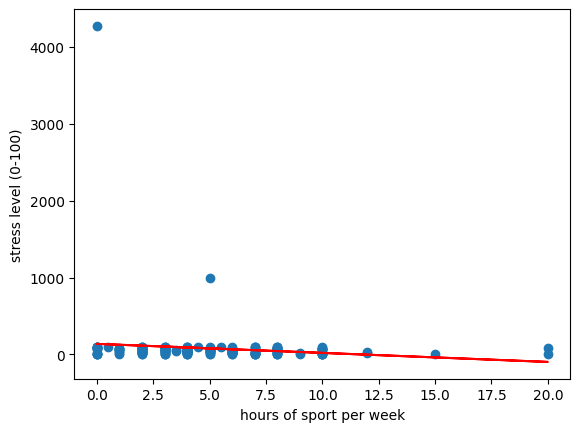

In [82]:
import matplotlib.pyplot as plt 
plt.scatter(X_train, y_train) 
plt.plot(X_train, y_pred_train, color = 'red')
plt.xlabel("hours of sport per week")
plt.ylabel("stress level (0-100)") 

In [83]:
X_test = np.array(X_test).reshape(-1, 1)
X_test.flatten()

array([ 4. ,  4. ,  3. ,  4. ,  0. ,  5. ,  3. ,  4. ,  3. ,  0. ,  3. ,
        5. ,  8. ,  5. ,  2. , 20. ,  8. ,  7. ,  6. ,  3. ,  0. ,  7. ,
        7. , 10. ,  7. ,  5. ,  4. ,  2. ,  8. ,  3. ,  0. ,  5. ,  3. ,
        3. ,  4. ,  4. , 10. ,  4. ,  1. , 15. , 10. ,  4. ,  3. ,  4. ,
        5. ,  4. ,  5. ,  7. ,  0. ,  1. ,  1. , 11. ,  0. ,  5. ,  2. ,
       10. ,  4. ,  5. ,  0. ,  4. ,  6. ,  5. ,  6. ,  1. ,  2. ,  1. ,
        7. ,  5. ,  5. ,  3. ,  2. ,  2. ,  3. ,  5. ,  0. ,  1. ,  3. ,
        6. ,  5. ,  4. ,  2. ,  2. ,  6. , 10. , 10. ,  5. ,  1. ,  6. ,
        5. , 15. ,  1. ,  1.5, 10. ,  8. ,  8. ,  6. ,  9. ,  2. ,  6. ,
        0. ,  6. , 10. ,  0. ,  3. ,  6. ,  2. ,  3. ,  4. ,  8. ,  1. ,
       10. ,  5. ,  2. ,  5. ,  0. ,  1. ,  5. , 10. ])

In [84]:
y_test = np.array(y_test).reshape(-1, 1)
y_test.flatten()

array([ 31,   0,  42,  66, 100,  40,  85,  10,  25,  40,  90,  10,  65,
        60,  50,  60,  20,  44,  20,  45, 100,  69,  40,  60,  10,  85,
        70,  99,  40,   0, 100,  15,  80,  51,  55,  80,  30,   6,  50,
        60,   1,  40, 100,  70,  62,  50,  65,  70,  10,  50,  20,   9,
         5,  80,  17,  70,  65,  10,  75,  60,   0,  80,  86, 100,  99,
        99,  50,  50,  26,  10,  60,  99,  35,  30,  45, 100,   0,  30,
        20,  10,  28,  60,  70,  15,  60,  50,  60,  60,  70,  20,  65,
        10,   1,  10,  50,  15,  15,  90,  10,   0,  40,  10,  73,  17,
        77, 100, 100,   0,  10,  30,  75,  20,   1,  43,  80,  50,  20,
        11])

In [85]:
y_pred_test = lr.predict(X_test)
y_pred_test.flatten()

array([ 89.45608469,  89.45608469, 101.21010697,  89.45608469,
       136.47217381,  77.70206241, 101.21010697,  89.45608469,
       101.21010697, 136.47217381, 101.21010697,  77.70206241,
        42.43999557,  77.70206241, 112.96412925, -98.60827179,
        42.43999557,  54.19401785,  65.94804013, 101.21010697,
       136.47217381,  54.19401785,  54.19401785,  18.93195101,
        54.19401785,  77.70206241,  89.45608469, 112.96412925,
        42.43999557, 101.21010697, 136.47217381,  77.70206241,
       101.21010697, 101.21010697,  89.45608469,  89.45608469,
        18.93195101,  89.45608469, 124.71815153, -39.83816039,
        18.93195101,  89.45608469, 101.21010697,  89.45608469,
        77.70206241,  89.45608469,  77.70206241,  54.19401785,
       136.47217381, 124.71815153, 124.71815153,   7.17792873,
       136.47217381,  77.70206241, 112.96412925,  18.93195101,
        89.45608469,  77.70206241, 136.47217381,  89.45608469,
        65.94804013,  77.70206241,  65.94804013, 124.71

Text(0, 0.5, 'stress level (0-100)')

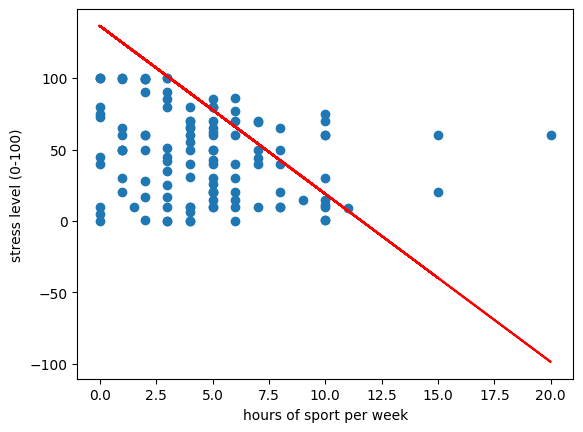

In [86]:
import matplotlib.pyplot as plt 
plt.scatter(X_test, y_test) 
plt.plot(X_test, y_pred_test, color = 'red')
plt.xlabel("hours of sport per week")
plt.ylabel("stress level (0-100)") 

In [87]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred_test)

45.86935926494868

In [88]:
mean_absolute_error(y_train, y_pred_train)

74.15122717200383

In [89]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_test)

3291.8243038077144

In [90]:
mean_squared_error(y_train, y_pred_train)

105687.90439265869

# Results
#results show large difference between the mean absolute error and mean squared error. This has to due with the many outliers that the data contains. Therefore the use of mean absolute error is therefore the best for miniziming the error. 
We tested first the data on the metrics MAE and MSE to see the difference in a data with lots of outliers. Out of that we continued with the MAE metric. MAE was initially measured with linear regression. As MAE appears to be better in data with outliers, it is then for testing this in different algorithms and compare which algorithm performs best. 



In [91]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_train)
y_pred1 = linreg.predict(X_test)
l1 = mean_absolute_error(y_train, y_pred)
l2 = mean_absolute_error(y_test, y_pred1)
print("MAE of Linear Regression on training set: {:.3f}".format(l1))
print("MAE of Linear Regression on test set: {:.3f}".format(l2))

MAE of Linear Regression on training set: 74.151
MAE of Linear Regression on test set: 45.869


In [92]:
from sklearn.tree import DecisionTreeRegressor


tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_train)
y_pred1 = tree.predict(X_test)
t1 = mean_absolute_error(y_train, y_pred)
t2 = mean_absolute_error(y_test, y_pred1)
print("MAE of Decision Tree Regressor on training set: {:.3f}".format(t1))
print("MAE of Decision Tree Regressor on test set: {:.3f}".format(t2))

MAE of Decision Tree Regressor on training set: 75.405
MAE of Decision Tree Regressor on test set: 59.610


In [93]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_pred1 = rf.predict(X_test)
r1 = mean_absolute_error(y_train, y_pred)
r2 = mean_absolute_error(y_test, y_pred1)
print("MAE of Random Forest Regressor on training set: {:.3f}".format(r1))
print("MAE of Random Forest Regressor on test set: {:.3f}".format(r2))

MAE of Random Forest Regressor on training set: 76.937
MAE of Random Forest Regressor on test set: 60.982


In [94]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_train)
y_pred1 = gb.predict(X_test)
g1 = mean_absolute_error(y_train, y_pred)
g2 = mean_absolute_error(y_test, y_pred1)
print("MAE of Gradient Boosting Regressor on training set: {:.3f}".format(g1))
print("MAE of Gradient Boosting Regressor on test set: {:.3f}".format(g2))

MAE of Gradient Boosting Regressor on training set: 75.380
MAE of Gradient Boosting Regressor on test set: 59.432


In [95]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_train)
y_pred1 = svr.predict(X_test)
s1 = mean_absolute_error(y_train, y_pred)
s2 = mean_absolute_error(y_test, y_pred1)
print("MAE of Support Vector Regressor on training set: {:.3f}".format(s1))
print("MAE of Support Vector Regressor on test set: {:.3f}".format(s2)) 



MAE of Support Vector Regressor on training set: 56.822
MAE of Support Vector Regressor on test set: 26.503


In [96]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_train)
y_pred1 = mlp.predict(X_test)
m1 = mean_absolute_error(y_train, y_pred)
m2 = mean_absolute_error(y_test, y_pred1)
print("MAE of MLP Regressor on training set: {:.3f}".format(m1))
print("MAE of MLP Regressor on test set: {:.3f}".format(m2))

MAE of MLP Regressor on training set: 65.237
MAE of MLP Regressor on test set: 34.777


In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp1 = MLPRegressor(random_state=42)
mlp1.fit(X_train_scaled, y_train)
y_pred = mlp1.predict(X_train_scaled)
y_pred1 = mlp1.predict(X_test_scaled)
m3 = mean_absolute_error(y_train, y_pred)
m4 = mean_absolute_error(y_test, y_pred1)
print("MAE of MLP Regressor on training set: {:.3f}".format(m3))
print("MAE of MLP Regressor on test set: {:.3f}".format(m4))



MAE of MLP Regressor on training set: 72.533
MAE of MLP Regressor on test set: 40.989


In [98]:
# increasing number of iterations 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp1 = MLPRegressor(random_state=42, max_iter=1000, alpha=1)
mlp1.fit(X_train_scaled, y_train)
y_pred = mlp1.predict(X_train_scaled)
y_pred1 = mlp1.predict(X_test_scaled)
m3 = mean_absolute_error(y_train, y_pred)
m4 = mean_absolute_error(y_test, y_pred1)
print("MAE of MLP Regressor on training set: {:.3f}".format(m3))
print("MAE of MLP Regressor on test set: {:.3f}".format(m4))

# increasing more iterations  did not  give better results on both sets , so 1000 iter. is to be the best giving result

MAE of MLP Regressor on training set: 71.509
MAE of MLP Regressor on test set: 39.273


In [99]:
import pandas as pd 

models = ["Linear Regression", "Random Forest Regression", "Decision Tree Regressor", "Gradient Boosting Regressor", "Support Vector Regressor", "MLP Regressor"]
tests_mae = [l2, r2, t2, g2, s2, m4]
compare_models = pd.DataFrame({"Algorithms": models, "Test MAE": tests_mae}) 
compare_models.sort_values(by="Test MAE", ascending = True) 


,Algorithms,Test MAE
4,Support Vector Regressor,26.503353
5,MLP Regressor,39.273453
0,Linear Regression,45.869359
3,Gradient Boosting Regressor,59.431679
2,Decision Tree Regressor,59.610490
1,Random Forest Regression,60.981876


In [100]:
from sklearn.metrics import mean_absolute_error 
from sklearn.svm import SVR 
from sklearn.datasets import make_regression  
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


params = { 
    "kernel": ("linear", "rbf", "poly"),
    "C": [0.1, 1, 10], 
    "gamma": ("scale", "auto"), 
    "degree": [2, 3], 
              }




In [101]:
svr = SVR()
grid_search = GridSearchCV(svr, params, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly')})

In [102]:
grid_search.best_params_

{'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

In [ ]:
import skopt 
from sklearn import pipeline 
from pipeline import pipe 
from skopt import BayesSearchCV

# Bayesian
n_iter = 70

param_grid = {
    "classifier__learning_rate": (0.0001, 0.1, "log-uniform"),
    "classifier__n_estimators": (100,  1000) ,
    "classifier__max_depth": (4, 400) 
}

optimizer  = BayesSearchCV(estimator=pipe,
                    search_spaces=param_grid,
                    n_iter=n_iter,
                    cv=5,
                    n_jobs=8,
                    scoring='neg_mean_squared_error',
                    random_state=1)

opt_ = optimizer.fit(X, y)



pipe = Pipeline([
    ('preprocess', preprocess),
    ('classifier', LGBMClassifier())
])




NameError: name 'pipe' is not defined

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svr1 = SVR()
svr1.fit(X_train_scaled, y_train)
y_pred = svr1.predict(X_train_scaled)
y_pred1 = svr1.predict(X_test_scaled)
s3 = mean_absolute_error(y_train, y_pred)
s4 = mean_absolute_error(y_test, y_pred1)
print("MAE of Support Vector Regressor on training set: {:.3f}".format(s3))
print("MAE of Support Vector Regressor on test set: {:.3f}".format(s4))

# Rescaling the data for ideal 0 - 1 gave no improvement to the data, which means or indicates that the default parameters 
# work well without the need for rescaling . It requires to have the features to vary on the same scale, this might be 
# already done in the default since no change was observed in the MAE 

MAE of Support Vector Regressor on training set: 56.822
MAE of Support Vector Regressor on test set: 26.503


In [ ]:
from skopt import BayesSearchCV
# parameter ranges are specified by one of below
>>> from skopt.space import Real, Categorical, Integer
>>>
>>> from sklearn.datasets import load_iris
>>> from sklearn.svm import SVC
>>> from sklearn.model_selection import train_test_split
>>>
>>> X, y = load_iris(True)
>>> X_train, X_test, y_train, y_test = train_test_split(X, y,
...                                                     train_size=0.75,
...                                                     random_state=0)
>>>
>>> # log-uniform: understand as search over p = exp(x) by varying x
>>> opt = BayesSearchCV(
...     SVC(),
...     {
...         'C': Real(1e-6, 1e+6, prior='log-uniform'),
...         'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
...         'degree': Integer(1,8),
...         'kernel': Categorical(['linear', 'poly', 'rbf']),
...     },
...     n_iter=32,
...     random_state=0
... )
>>>
>>> # executes bayesian optimization
>>> _ = opt.fit(X_train, y_train)
>>>
>>> # model can be saved, used for predictions or scoring
>>> print(opt.score(X_test, y_test))
0.973...

SyntaxError: invalid syntax (Temp/ipykernel_23804/1950755955.py, line 32)